In [2]:
#Load libraries for analysis 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
from plotly import subplots
from plotly.subplots import make_subplots

In [143]:
#Load the dataset

nba_df = pd.read_excel("./Resource/NBA All Star Games (1).xlsx")
nba_df.head()

,Year,Player,Pos,HT,HT.1,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016,Stephen Curry,G,6'3,2017-06-03 00:00:00,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,6'5,2017-06-05 00:00:00,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,6'9,2017-06-09 00:00:00,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,6'7,2017-06-07 00:00:00,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,6'11,2017-06-11 00:00:00,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States


In [144]:
#Drop HT.1 Column since it renders as date and not height

nba_clean = nba_df.drop(['HT.1'], axis= 1)
nba_clean.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016,Stephen Curry,G,6'3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,6'5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,6'9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,6'7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,6'11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States


In [145]:
#Check number of records 

len(nba_clean)


439

In [146]:
#Examine data types of each column
nba_clean.dtypes

nba_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
Year                439 non-null int64
Player              439 non-null object
Pos                 439 non-null object
HT                  439 non-null object
WT                  439 non-null int64
Team                439 non-null object
Selection Type      439 non-null object
NBA Draft Status    439 non-null object
Nationality         439 non-null object
dtypes: int64(2), object(7)
memory usage: 30.9+ KB


In [7]:
#Check for null values 
nba_clean.isnull().sum()


Year                0
Player              0
Pos                 0
HT                  0
WT                  0
Team                0
Selection Type      0
NBA Draft Status    0
Nationality         0
dtype: int64

# Data Cleaning 

1. The NBA Draft Status can be separated into three different columns for better analysis: Draft Year, Round, Pick Number
2. The Position column is inconsistent as well. There are different iterations for the same position and entry types (F-C vs. FC, both stand for forward-center)
3. Some players were undrafted so will have to modify 'Round' column to have right values 



In [147]:
#Split the NBA Draft Status Column into three separate columns for better analysis 
nba_clean['Draft Year'] = nba_clean["NBA Draft Status"].str.split(" ").apply(lambda x:x[0])
nba_clean['Round'] = nba_clean["NBA Draft Status"].str.split(" ").apply(lambda x:x[2])
nba_clean['Pick'] = nba_clean["NBA Draft Status"].str.split(" ").apply(lambda x:x[-1])
nba_clean['Round'] = np.where(nba_clean['Round'] == 'Draft,', 'Undrafted', nba_clean['Round'])


nba_clean.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Draft Year,Round,Pick
0,2016,Stephen Curry,G,6'3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,2009,1,7
1,2016,James Harden,SG,6'5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,2009,1,3
2,2016,Kevin Durant,SF,6'9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,2007,1,2
3,2016,Kawhi Leonard,F,6'7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,2011,1,15
4,2016,Anthony Davis,PF,6'11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,2012,1,1


In [149]:
#4 NBA teams have gone through new changes: New Jersey Nets, New Orlean Hornets, Charlotte Bobcats, and Seattle Supersonics.
#Create a function to address current, consistant values 

def change_team(df):
    df['Team'] = np.where(df['Team'] == 'New Jersey Nets', 'Brooklyn Nets', df['Team'])
    df['Team'] = np.where(df['Team'] == 'New Orleans Hornets', 'New Orleans Pelicans', df['Team'])
    df['Team'] = np.where(df['Team'] == 'Charlotte Bobcats', 'Charlotte Hornets', df['Team'])
    df['Team'] = np.where(df['Team'] == 'Seattle SuperSonics', 'Oklahoma City Thunder', df['Team'])
    
    return df 

change_team(nba_clean)

nba_clean.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Draft Year,Round,Pick
0,2016,Stephen Curry,G,6'3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,2009,1,7
1,2016,James Harden,SG,6'5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,2009,1,3
2,2016,Kevin Durant,SF,6'9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,2007,1,2
3,2016,Kawhi Leonard,F,6'7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,2011,1,15
4,2016,Anthony Davis,PF,6'11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,2012,1,1


In [150]:
#Change Nationality for better analysis comparsion: US vs World? 

def change_nationality(df):
    df['Nationality'] = np.where(df['Nationality'] != 'United States', 'World', df['Nationality'])
    
    return df 

change_nationality(nba_clean)

nba_clean.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Draft Year,Round,Pick
0,2016,Stephen Curry,G,6'3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,2009,1,7
1,2016,James Harden,SG,6'5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,2009,1,3
2,2016,Kevin Durant,SF,6'9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,2007,1,2
3,2016,Kawhi Leonard,F,6'7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,2011,1,15
4,2016,Anthony Davis,PF,6'11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,2012,1,1


In [151]:
#Change the positions to ensure consistency 

real_position = {'SF':'F','F-C':'F','PG':'G','SG':'G',
                 'G-F':'G','G':'G','F':'F','C':'C','GF':'F',
                 'FC':'F','PF':'F'}

nba_clean['Pos'] = nba_clean['Pos'].map(real_position)
nba_clean.head(10)

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Draft Year,Round,Pick
0,2016,Stephen Curry,G,6'3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,2009,1,7
1,2016,James Harden,G,6'5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,2009,1,3
2,2016,Kevin Durant,F,6'9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,2007,1,2
3,2016,Kawhi Leonard,F,6'7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,2011,1,15
4,2016,Anthony Davis,F,6'11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,2012,1,1
5,2016,Russell Westbrook,G,6'3,200,Oklahoma City Thunder,Western All-Star Coaches Selection,2008 Rnd 1 Pick 4,United States,2008,1,4
6,2016,DeMarcus Cousins,C,6'11,270,Sacramento Kings,Western All-Star Coaches Selection,2010 Rnd 1 Pick 5,United States,2010,1,5
7,2016,Klay Thompson,G,6'7,215,Golden State Warriors,Western All-Star Coaches Selection,2011 Rnd 1 Pick 11,United States,2011,1,11
8,2016,Draymond Green,F,6'7,230,Golden State Warriors,Western All-Star Coaches Selection,2012 Rnd 2 Pick 5,United States,2012,2,5
9,2016,Marc Gasol,C,7'1,255,Memphis Grizzlies,Western All-Star Coaches Selection,2007 Rnd 2 Pick 18,World,2007,2,18


In [154]:
#Drop redudant column 
# nba_clean = nba_clean.drop(['NBA Draft Status'], axis=1)

nba_clean.head()

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Round,Pick
0,2016,Stephen Curry,G,6'3,190,Golden State Warriors,Western All-Star Fan Vote Selection,United States,2009,1,7
1,2016,James Harden,G,6'5,220,Houston Rockets,Western All-Star Fan Vote Selection,United States,2009,1,3
2,2016,Kevin Durant,F,6'9,240,Golden State Warriors,Western All-Star Fan Vote Selection,United States,2007,1,2
3,2016,Kawhi Leonard,F,6'7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,United States,2011,1,15
4,2016,Anthony Davis,F,6'11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,United States,2012,1,1


In [155]:
#Create Column to distingush conference 

nba_clean['Conference'] = np.where(nba_clean['Selection Type'].str.startswith('Eastern'), 'East','West')

nba_clean

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Round,Pick,Conference
0,2016,Stephen Curry,G,6'3,190,Golden State Warriors,Western All-Star Fan Vote Selection,United States,2009,1,7,West
1,2016,James Harden,G,6'5,220,Houston Rockets,Western All-Star Fan Vote Selection,United States,2009,1,3,West
2,2016,Kevin Durant,F,6'9,240,Golden State Warriors,Western All-Star Fan Vote Selection,United States,2007,1,2,West
3,2016,Kawhi Leonard,F,6'7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,United States,2011,1,15,West
4,2016,Anthony Davis,F,6'11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,United States,2012,1,1,West
5,2016,Russell Westbrook,G,6'3,200,Oklahoma City Thunder,Western All-Star Coaches Selection,United States,2008,1,4,West
6,2016,DeMarcus Cousins,C,6'11,270,Sacramento Kings,Western All-Star Coaches Selection,United States,2010,1,5,West
7,2016,Klay Thompson,G,6'7,215,Golden State Warriors,Western All-Star Coaches Selection,United States,2011,1,11,West
8,2016,Draymond Green,F,6'7,230,Golden State Warriors,Western All-Star Coaches Selection,United States,2012,2,5,West
9,2016,Marc Gasol,C,7'1,255,Memphis Grizzlies,Western All-Star Coaches Selection,World,2007,2,18,West


In [156]:
#Check to enure no data was lost in cleaning 
nba_clean.isnull().sum()

Year              0
Player            0
Pos               0
HT                0
WT                0
Team              0
Selection Type    0
Nationality       0
Draft Year        0
Round             0
Pick              0
Conference        0
dtype: int64

In [157]:
nba_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 12 columns):
Year              439 non-null int64
Player            439 non-null object
Pos               439 non-null object
HT                439 non-null object
WT                439 non-null int64
Team              439 non-null object
Selection Type    439 non-null object
Nationality       439 non-null object
Draft Year        439 non-null object
Round             439 non-null object
Pick              439 non-null object
Conference        439 non-null object
dtypes: int64(2), object(10)
memory usage: 41.2+ KB


In [20]:
#Check if all 30 NBA teams have participated in the All Star Games from 2000-2016 
nba_clean['Team'].nunique()

30

In [61]:
#Check the number of years, 2000-2016 
nba_clean['Year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000], dtype=int64)

In [64]:
nba_clean['Pos'].unique()

array(['G', 'F', 'C'], dtype=object)

# Team Analysis

In [158]:
#First lets look at which teams had the most All Star Selections


teams = pd.DataFrame(nba_clean.groupby('Team').size()).reset_index()
teams.columns =['Team', 'Count']


figure = go.Figure()

figure.add_trace(go.Bar( x = teams.Team,
                       y = teams.Count,
                       text = teams.Count,
                       marker = dict(color = teams.Count, colorscale='Temps')))

figure.update_layout(
title ={'text': 'All Star Selection Per Team, 2000 to 2016', 'xanchor': 'left', 'yanchor': 'top'},
        xaxis_title = 'NBA Teams',
        yaxis_title = 'Number of All Stars Selected',
       xaxis_tickfont_size = 12, 
       xaxis= dict(titlefont_size = 14, tickangle=45),
        yaxis=dict(titlefont_size = 14,
                  tickfont_size= 12),
            width= 950)



The four teams with the most All Star selections: Boston Celtics, Los Angeles Lakers, Miami Heat, and San Antonio Spurs. Overall, these are considered the big market teams whom received prime time games and spending cap space. 

The Celtic and Lakers rivalry and winning cultures are well-documented, resulting in two Finals appearances in 2008 and 2010. Both teams have multiple current and future Hall of Famers.

The Heat has won 3 NBA titles. In 2006, Wade and Shaq won its first franchise championship. The "Big Three" won back to back championships in 2012 and 2013. 

The Spurs have won 5 NBA titles between 2000-2016 which explains the high amount of all start selections.

On the contrary, the smaller market teams such as, Charlotte Hornets, Milwaukee Bucks, and Memphis Grizzlies, have low selections.

In [159]:
#Let's look at number of All Star Selections per YEAR for each TEAM

stars_per_year = pd.DataFrame(nba_clean.groupby(['Year', 'Team']).size()).reset_index()

stars_per_year.columns = ['Year', 'Team', 'Count']

#MAp team Conferences to drop duplicates 

map_TC = nba_clean[['Team','Conference']].drop_duplicates().set_index('Team').to_dict()['Conference']
stars_per_year['Conference'] = stars_per_year['Team'].map(map_TC)


east_stars_per_year = stars_per_year.loc[stars_per_year['Conference'] == 'East']

west_stars_per_year = stars_per_year.loc[stars_per_year['Conference'] == 'West']


In [27]:
fig = go.Figure()


East = go.Scatter(x = east_stars_per_year['Year'],
                      y = east_stars_per_year['Team'],
                      marker= dict(size = (east_stars_per_year.Count + 2) ** 2 ,color = east_stars_per_year.Count, colorscale = 'Portland', showscale=True),
                      name = 'East',
                      mode = 'markers',
                      text= east_stars_per_year.Count)

West = go.Scatter(x = west_stars_per_year['Year'],
                      y = west_stars_per_year['Team'],
                      marker= dict(size = (west_stars_per_year.Count + 2) ** 2  , color = west_stars_per_year.Count, colorscale = 'Portland', showscale= True),
                      name = 'West',
                      mode = 'markers',
                      text= west_stars_per_year.Count)

data = [East, West]

updatemenus = list([
    dict(active = 2, 
        buttons= list([
            dict(label= 'East',
                method = 'restyle',
                args = ['visible', [True, 'legendonly']]
                ),
            dict(label= 'West',
                method = 'restyle',
                args = ['visible', ['legendonly', True]]
                ),
            dict(label= 'All',
                method = 'restyle',
                args = ['visible', [True, True]]
                )
        ]),
         direction = 'down',
         pad ={'r' : 10, 't': 10},
         showactive= True,
         x=-0.2,
         xanchor = 'left',
         y=1.1,
         yanchor = 'top'
)])

layout = dict(title ={'text': 'All Star Selections Per Year and Team', 'y': 0.95, 'x' : 0.5, 'xanchor' : 'center', 'yanchor': 'top'}, 
              showlegend = False,
              height = 850,
              updatemenus = updatemenus,
            xaxis= dict(categoryorder = 'category ascending'), 
              yaxis = dict(titlefont_size =12,
                          tickfont_size = 12), 
             annotations=[
                 go.layout.Annotation(text='Conference Selection',  x = -0.2, xref='paper', y =  1.13, yref='paper' , align = 'left', showarrow= False)
             ])



fig = dict(data=data, layout=layout)
iplot(fig) 

In the Western Conference, the Golden State Warriors and Phoenix Suns stand out the most. Warriors clearly became a strong team starting in 2012; they had no All-Star selections from 2000 to 2011. Phoenix Suns had some success when 3 All-Stars were selected each year in 2004 and 2006. San Antonio Spurs have remained relevant, resulting in at least 1 All-Star every year from 2000 to 2016.


In the Eastern Conference, the Boston Celtics, Miami Heat, Detroit Pistons, and Atlanta Hawks stand out. From 2007 to 2010, the Celtics won one championship and advanced to the playoffs. Lebron, Wade, and Bosh won back to back championships (12' & 13') for Miami. Their reign of dominance started in 2010 with the emergence of the 'Big Three': Lebron, Wade, and Bosh. In 2014, Atlanta Hawks had a superb regular season which resulted in 4 All-Stars but no Finals appearance.

I included a drop down menu to toggle between conferences and show all. 

In [161]:
sel_type  = pd.DataFrame(nba_clean.groupby(['Selection Type']).size()).reset_index()
sel_type.columns = ['Selection Type','Frequency']

# sel_type.plot(kind = 'barh', x = 'Selection Type', y= 'Count', figsize = (12,10))
# plt.title('Selection Types by Conference', fontsize = 18)
# plt.xlabel('Number of Selections')

# plt.savefig('selectiontypes.png')


fig = px.bar(sel_type, x ='Selection Type', y = 'Frequency' )
fig.update_layout(
title= {'text': "Selection Type Distribution", 'x': .45, 'y':0.95}, width = 900, height = 700)
fig.show()

It is clear that the Selection type did not change much and the frequencies of each kind are well-balanced.

# Individual Player Analysis


In [177]:
#Let's see the distribution of All-Stars based on their original draft round

nba_clean.drop_duplicates('Player')['Round'].value_counts()


1            106
2             14
Undrafted      2
3              1
Name: Round, dtype: int64

It seems a player in a higher draft round has a higher likely chance of being an All-Star at some point in their career. This speaks volumns on the draft selection process and scouting by teams. However, a few players had defied the odds as undrafted and third round pick.

In [163]:
#I am curious to see the undrafted players who made a big impact 

a = nba_clean.loc[nba_clean['Round'] == 'Undrafted']

a.drop_duplicates()

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Round,Pick,Conference
309,2005,Ben Wallace,F,6'9,240,Detroit Pistons,Eastern All-Star Coaches Selection,United States,1996,Undrafted,Undrafted,East
334,2004,Ben Wallace,F,6'9,240,Detroit Pistons,Eastern All-Star Coaches Selection,United States,1996,Undrafted,Undrafted,East
346,2003,Brad Miller,C,7'1,261,Sacramento Kings,Western All-Star Coaches Selection,United States,1998,Undrafted,Undrafted,West
348,2003,Ben Wallace,F,6'9,240,Detroit Pistons,Eastern All-Star Fan Vote Selection,United States,1996,Undrafted,Undrafted,East
360,2002,Ben Wallace,F,6'9,240,Detroit Pistons,Eastern All-Star Fan Vote Selection,United States,1996,Undrafted,Undrafted,East
371,2002,Brad Miller,C,7'1,261,Indiana Pacers,Eastern All-Star Coaches Selection,United States,1998,Undrafted,Undrafted,East


Brad Miller and Ben Wallace were the only two undrafted players to make the All-Star selection between 2000 to 2016. They were also selected more than once! 

In [164]:
b = nba_clean.loc[nba_clean['Round'] == '3']
b 

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Round,Pick,Conference
422,2000,Anthony Mason,F,6'7,250,Miami Heat,Eastern All-Star Coaches Selection,United States,1988,3,3,East


Anthony Mason was the only third round pick to ever make an All-Star selection. Interestingly, the NBA reduced the draft to two rounds (30 picks in each round) in 1989.

In [165]:
top_20 = nba_clean['Player'].value_counts()

#Select top 20 players based on number of All-Star Selections h
top_20_as = top_20[:21]
top_20_as

Kobe Bryant         16
Dirk Nowitzki       13
Tim Duncan          13
LeBron James        13
Kevin Garnett       12
Dwyane Wade         12
Chris Bosh          11
Allen Iverson       10
Paul Pierce         10
Chris Paul           9
Carmelo Anthony      9
Ray Allen            9
Kevin Durant         8
Dwight Howard        8
Steve Nash           8
Yao Ming             8
Shaquille O'Neal     8
Tracy McGrady        7
Jason Kidd           7
Vince Carter         7
Joe Johnson          7
Name: Player, dtype: int64

In [23]:
top_20_df = pd.DataFrame(top_20_as)

top_20_df = top_20_df.reset_index()

top_20_df.columns = 'Player', 'All-Star Selections'

top_20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Player                 21 non-null object
All-Star Selections    21 non-null int64
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [166]:
fig = px.bar(top_20_df, x ='Player', y = 'All-Star Selections' )
fig.update_layout(
title= {'text': "Top 20 Players by All-Star Appearances from 2000 to 2016", 'x': .5, 'y':0.95})
fig.show()

In [167]:
#Changed Draft Year to have same int type for operations
df = nba_clean.astype({'Draft Year': int})



In [168]:
#Find the player with the least years in the league and selected as an All-Star

# df['Years in League until All-Star Selection'].min()


df['Years in League until All-Star Selection'] = df['Year'] - df['Draft Year']
df.loc[df['Years in League until All-Star Selection'] == 0]

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Round,Pick,Conference,Years in League until All-Star Selection
373,2002,Yao Ming,C,7'6,310,Houston Rockets,Western All-Star Fan Vote Selection,World,2002,1,1,West,0


I used 0 since All-Star is during a season so a player would be under 1 year. Yao was voted to start for the West over O'Neal, who was coming off three consecutive NBA Finals MVP Awards. Yao  became the first rookie to start in the All-Star Game since Grant Hill in 1995.

In [179]:
#Find the player with the most years in the league and selected as an All-Star

# df['Years in League until All-Star Selection'].max()

df.loc[df['Years in League until All-Star Selection'] == 19]

,Year,Player,Pos,HT,WT,Team,Selection Type,Nationality,Draft Year,Round,Pick,Conference,Years in League until All-Star Selection
38,2015,Kobe Bryant,G,6'6,212,Los Angeles Lakers,Western All-Star Fan Vote Selection,United States,1996,1,13,West,19


In 2015, Kobe Bryant was the 'oldest' All-Star in terms of years playing in the NBA.

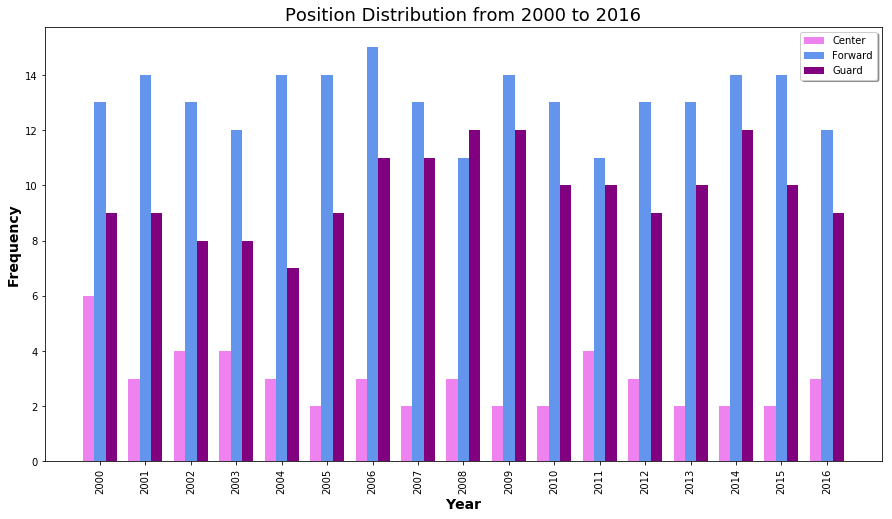

<Figure size 432x288 with 0 Axes>

In [3]:
barWidth = 0.25 

#Set Height of the bar 
center = [6, 3 , 4, 4, 3, 2, 3 , 2, 3, 2, 2,4, 3, 2, 2, 2, 3]

forward = [13, 14, 13, 12, 14, 14, 15, 13 ,11 ,14, 13 , 11, 13, 13, 14, 14, 12]

guard = [ 9, 9, 8, 8 , 7, 9 ,11, 11, 12, 12, 10, 10, 9, 10, 12, 10, 9]

#Set position of the bar on the X Axis 
r1 = np.arange(len(center))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Adjust figure size 
plt.figure(figsize=(15,8))

#Make Plot
plt.bar(r1, center, color='violet', width= barWidth, label='Center')
plt.bar(r2, forward, color='cornflowerblue', width= barWidth, label='Forward')
plt.bar(r3, guard, color='purple', width= barWidth, label='Guard')




#Add XTicks 
plt.xlabel('Year', fontweight ='bold', fontsize = 14)
plt.ylabel('Frequency', fontweight= 'bold',  fontsize = 14)
plt.title('Position Distribution from 2000 to 2016', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(center))], ['2000', '2001', '2002', '2003','2004', 
                                                '2005', '2006' ,'2007', '2008','2009', '2010', '2011','2012', '2013', '2014', '2015', '2016'], rotation= 90)
plt.legend(fancybox=True, shadow= True, loc='upper right')
plt.show()

plt.savefig('positiondistribution.png')
